# Описание проекта

Данный проект демонстрирует **паноптическую сегментацию** изображений и видео с использованием предварительно обученной модели Detectron2, основанной на **FPN с ResNet-101**, обученной на датасете **COCO**.

Этот пет проект создан для тренировки использования предобученных моделей и визуализации

*Автор: Алексей В.*


# Описание задачи

## Цель

Цель проекта — применить **паноптическую сегментацию** к изображениям и видеокадрам, для беспилотных автомобилей и дронов:

* **"Вещи"** (things) — объекты с чёткими границами: люди, автомобили, животные и т.п.
* **"Материи"** (stuff) — однородные области: небо, дорога, трава и т.п.

Итогом является видео с наложенной разметкой, показывающее все распознанные объекты с цветовой маркировкой и подписями.


## Используемые данные и модель

* **Модель**: Panoptic FPN с backbone ResNet-101
* **Предобучена на**: COCO dataset (через Detectron2)
* **Входные данные**: изображение и видео
* **Результат**: карта паноптической сегментации с подписями и цветами




# Содержание проекта

### 1. Установка библиотек и подключение Google Drive

### 2. Загрузка модели Detectron2 и настройка конфигурации

### 3. Обработка одиночного изображения

### 4. Паноптическая сегментация видео

### 5. Визуализация результата в ноутбуке

## 1. Установка библиотек и подключение **Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Установка библиотек
#!pip install opencv-python-headless
#!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install -U git+https://github.com/facebookresearch/detectron2.git


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/9

In [ ]:
import cv2
import torch
import moviepy.editor as mp
from matplotlib import pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import os
from tqdm import tqdm


## 2. Загрузка модели **Detectron2** и настройка конфигурации

In [ ]:
cfg = get_cfg()


cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)


model_final_cafdb1.pkl: 261MB [00:04, 52.2MB/s]                           


## 3. Обработка одиночного изображения

In [ ]:

image = cv2.imread("/content/drive/MyDrive/datas/segmentation/9DDDB61F-76D8-4827-BAE1-5F187FB1386E-e1605859015812.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

outputs = predictor(image)


/usr/local/lib/python3.11/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


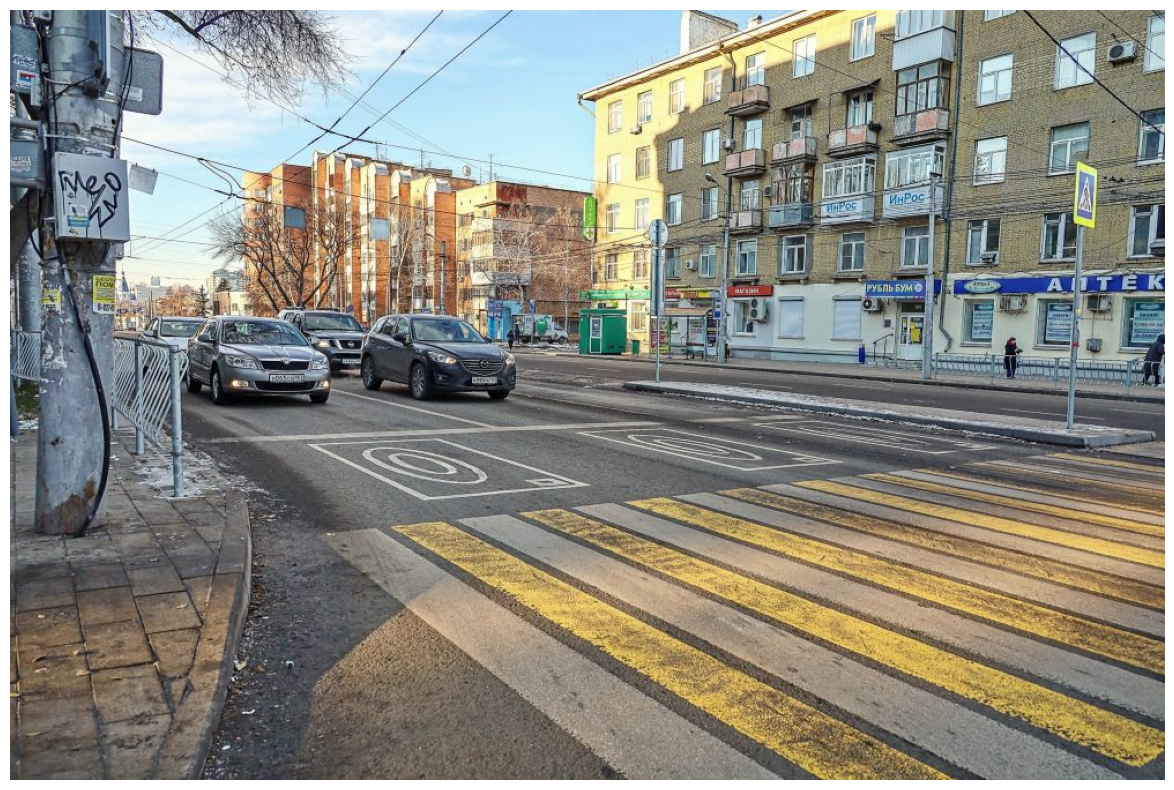

In [7]:
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

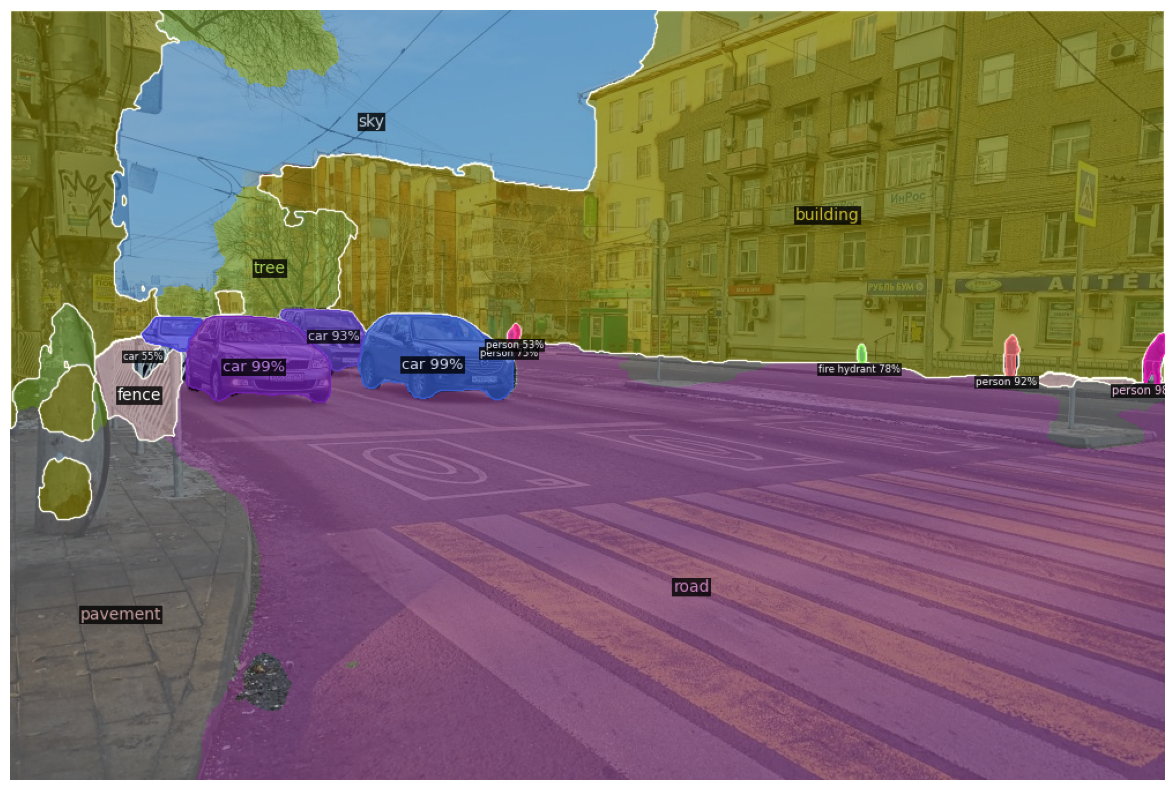

In [8]:
v = Visualizer(image, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_panoptic_seg_predictions(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1])
plt.figure(figsize=(15, 10))
plt.imshow(out.get_image())
plt.axis('off')
plt.show()


## 4. Паноптическая сегментация видео

In [9]:
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
input_video_path = "/content/drive/MyDrive/datas/segmentation/12.mp4"
output_video_path = "output_segmented.mp4"
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))



In [10]:
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out_video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

In [11]:
for _ in tqdm(range(frame_count)):
    ret, frame = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    outputs = predictor(image)

    v = Visualizer(image, metadata=metadata, scale=1.0)
    panoptic_seg, segments_info = outputs["panoptic_seg"]
    vis = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
    result = vis.get_image()
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

    out_video.write(result_bgr)

cap.release()
out_video.release()

100%|██████████| 163/163 [29:00<00:00, 10.68s/it]


## 5. Визуализация результата
Из за ограничения Jupyter Notebook мне пришлось сжать видео, чтобы показать его прямо в коде 

In [ ]:


# Сжимаем и перезаписываем видео
clip = mp.VideoFileClip("output_segmented.mp4")
clip_resized = clip.resize(height=480)  # уменьшаем размер
clip_resized.write_videofile("output_segmented_small.mp4", bitrate="500k")  # уменьшаем битрейт


  if event.key is 'enter':



Moviepy - Building video output_segmented_small.mp4.
Moviepy - Writing video output_segmented_small.mp4



Moviepy - Done !
Moviepy - video ready output_segmented_small.mp4


In [19]:
from IPython.display import HTML
from base64 import b64encode

video_path = "output_segmented_small.mp4"
mp4 = open(video_path, "rb").read()
b64 = b64encode(mp4).decode()

HTML(f"""
<video width=800 controls>
  <source src="data:video/mp4;base64,{b64}" type="video/mp4">
</video>
""")
